# A statistical model
- A mathemtical expression of the process that generates your data.
- Usually probabilistic!, ie. doensn't tell you **exactly** what every $x_i$ will be, e.g, $x$ is gaussian-distributed, but we don't know what a given $x_i$ will be 

- Usually a model has some free parmeters, e.g, we know $x$ is gaussian-distributed, but we don't know the $\mu$ or $\sigma$

- We call the set of model parameters the vector $\theta$

- "All models are wrong, some are useful" - George Box

In [161]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

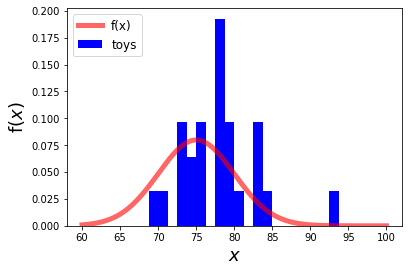

In [162]:
mu = 80.0
sigma = 5.0
nEvents = 25
nBins = 20

toys = np.random.normal(loc=mu, scale=sigma, size=nEvents)

df = pd.DataFrame(toys, columns=['events'])
dataCounts, dataBins = np.histogram(df, bins=nBins, density=True)
binCentres = (dataBins[:-1] + dataBins[1:]) / 2
width = np.diff(dataBins)

plt.figure()
plt.bar(binCentres, dataCounts, align='center', width=width, label='toys', color='b')

ax = plt.gca()
labely = ax.set_xlabel("$x$", fontsize = 18)
labely = ax.set_ylabel("f($x$)", fontsize = 18)

x = np.linspace(60.0, 100.0, 5000)
ax.plot(x, stats.norm.pdf(x, 75, 5), 'r-', lw=5, alpha=0.6, label='f(x)')

legend = ax.legend(loc='upper left', fontsize='large')
plt.show() 
plt.close()  

# The method of maximum likelihood
- If the model parmeters are $\theta$, how probable is the data?
- If we assume all $x_i$ are independent, we can multiple the probabilities for each $x_i$ together

- $L(\theta) = \prod^{n}_{1} f(x;\theta)dx_{i}$

- If the model and parameters are correct, we expect $L(\theta)$ to be *high*
- But absolute value $L(\theta)$ doesn't have much meaning...


- finding the $\theta$ values that maximixe $L$ produce a better model for the data
    - we have, in a model-depdent way, *estimated* $\theta$
    - Often, instead of $L(\theta)$ we work with the $(-2 * log (L(\theta) )) $
    - it turns the product into a sum
    -  $ log\; L(\theta) = \sum^{n}_{1} log ( f(x;\theta) ) $

- Maximising $log\; L(\theta)$ is equivalent to maximising $L(\theta)$


L is max for theta = 77.87878787878788


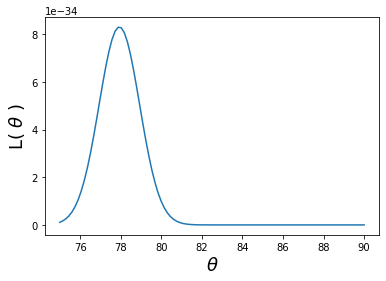

In [163]:
like_l = 1.0
max_like_l = 0.0

like_l_ar = np.array([])
mu_guesses = np.linspace(75.0, 90.0, 100)

best_mu = 0.0

for guess_mu in mu_guesses:
    like_l = 1.0
    for toy in toys:
        like_l = like_l*(stats.norm.pdf(toy, guess_mu, 5))
    like_l_ar = np.append(like_l_ar, like_l)
    if (like_l > max_like_l):
        best_mu = guess_mu
        max_like_l = like_l 

fig, ax = plt.subplots()
ax.set_xlabel(r"$\theta$", fontsize = 18)
ax.set_ylabel(r"L( $\theta$ )", fontsize = 18)
plt.plot(mu_guesses,like_l_ar,label="some data")

print("L is max for theta = "  + str(best_mu))

L is min for theta = 77.87878787878788


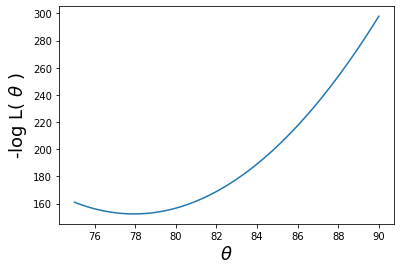

In [164]:
nll_ar = - 2.0*np.log(like_l_ar)

fig, ax = plt.subplots()
ax.set_xlabel(r"$\theta$", fontsize = 18)
ax.set_ylabel(r"-log L( $\theta$ )", fontsize = 18)
plt.plot(mu_guesses,nll_ar,label="some data")

print("L is min for theta = "  + str(mu_guesses[np.argmin(nll_ar, axis=0)]))

L is min for theta = 77.87878787878788


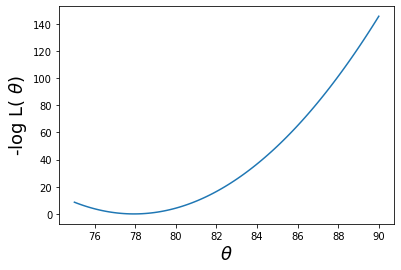

In [165]:
delta_nll_ar = nll_ar - np.min(nll_ar)

fig, ax = plt.subplots()
ax.set_xlabel(r"$\theta$", fontsize = 18)
ax.set_ylabel(r"-log L( $\theta$)", fontsize = 18)
plt.plot(mu_guesses,delta_nll_ar,label="some data")

print("L is min for theta = "  + str(mu_guesses[np.argmin(delta_nll_ar, axis=0)]))

L is min for theta = 77.87878787878788
26
-2 * log (L) ~ 1 for theta = 78.93939393939394
-2 * log (L) ~ 1 for theta = 76.96969696969697


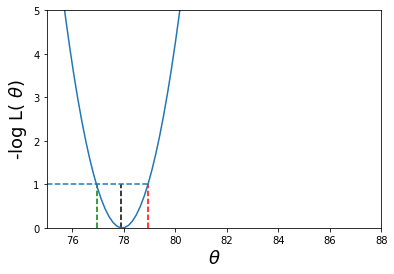

In [171]:
delta_nll_ar = nll_ar - np.min(nll_ar)

fig, ax = plt.subplots()
ax.set_xlabel(r"$\theta$", fontsize = 18)
ax.set_ylabel(r"-log L( $\theta$)", fontsize = 18)
ax.set_xlim([75, 88]) 
ax.set_ylim([0, 5]) #zooming in

plt.plot(mu_guesses,delta_nll_ar,label="some data")

print("L is min for theta = "  + str(mu_guesses[np.argmin(delta_nll_ar, axis=0)]))

delta1_nll_ar = np.abs (delta_nll_ar - 1.0)

result = np.argpartition(delta1_nll_ar, 4)

print(result[:2][0])

#print("-2 * log (L) ~ 1 for theta = "  + str(mu_guesses[np.argmin(delta1_nll_ar, axis=0)]))

print("-2 * log (L) ~ 1 for theta = "  + str( mu_guesses[result[:2][0]] ) )
print("-2 * log (L) ~ 1 for theta = "  + str( mu_guesses[result[:2][1]] ) )


plt.vlines( mu_guesses[np.argmin(delta_nll_ar, axis=0)]     , 0.0, 1.0,  linestyle="dashed", color="black")
plt.vlines( mu_guesses[result[:2][0]], 0.0, 1.0,  linestyle="dashed", color="red")
plt.vlines( mu_guesses[result[:2][1]], 0.0, 1.0,  linestyle="dashed", color="green")


plt.hlines(1.0, 0.0, mu_guesses[result[:2][0]] ,  linestyle="dashed")
 

yCV = [0.1, 0.01, 0.001]

for p in yCV:
    xCV = stats.chi2.ppf((1.0 - p), df)
    

# What if the data is binned and bins are gaussian-distributed?



- $L(\theta) = \prod^{n}_{1} f(x;\theta)dx_{i} = \prod^{n}_{1} \frac {1}{\sigma {\sqrt {2\pi }}}\exp \left(-{\frac {1}{2}}{\frac {(x-\mu )^{2}}{\sigma ^{2}}}\right) dx_{i} $


- $ -2* log L(\theta) = \sum^{n}_{1}  \frac {(x-\mu)^{2}}{\sigma^{2}} $

...droppping additive terms that don't depend on $\mu$


- this is known as the $\chi^{2}$ test-statistic

- $\chi^{2}$ is closely related to Likelihood 

- minimising $\chi^{2}$ equivalent to maximising L with gaussian assumption



# What if the data is binned and bins are gaussian-distributed?

-  When we work with binned data, we often work with the $\chi^{2}$ test-statistic

$\chi^{2} = \sum\limits_{i=1}^{i = nBins} \frac{(x_{i} - p_{i})^{2}}{\sigma^{2}_{i}}$


# What is a **hypothesis**?
- A **proposed explanation** for a dataset
  - e.g. the data $x$ was produced by a process that obeys pdf $f(x)$
- In particle physics, we often need to answer questions like:
    - How well does my data agree with the hypothesis $H$?
    - e.g. Does the data agree with expectation from the Standard Model? or is it better explained by a hypothesis involving new physics?
    
- Calculating the $\chi^{2}$ test-statistic is one of the simplest approaches

# Hypothesis testing with the $\chi^{2}$ test-statistic

- **Test-statistic**:  a single random variable that summarises a dataset in terms of its agreement with a hypothesis


Demo:
* Generate Gaussian-distributed random numbers.
* Show that for vectors of $M$ such numbers, the $\chi^{2}$ **test statistic** obeys a $\chi^{2}$ **distribution**.
* Use this distribution to quantify how well an experimental result supports a hypothesis

**Generating random numbers that obey a Gaussian distribution**

* initalisation:
    * the mean (mu) and standard deviation (sigma) of the underlying Gaussian distribution 
    * the number of random numbers we want to generate
    * the number of bins in our histogram
    
* generation:
   * np.random module is callend and events are filled into a pandas dataframe
   * events are then binned in a np.histogram
   * density=True sets the histogram integral = 1, allowing direct comparison to the underlying pdf

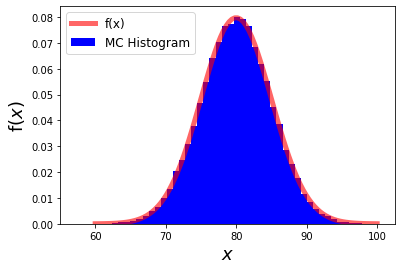

In [172]:
mu = 80.0
sigma = 5.0
nEvents = 50000
nBins = 50

df = pd.DataFrame(np.random.normal(loc=mu, scale=sigma, size=nEvents), columns=['events'])
dataCounts, dataBins = np.histogram(df, bins=nBins, density=True)
binCentres = (dataBins[:-1] + dataBins[1:]) / 2
width = np.diff(dataBins)

plt.figure()
plt.bar(binCentres, dataCounts, align='center', width=width, label='MC Histogram', color='b')

ax = plt.gca()
labely = ax.set_xlabel("$x$", fontsize = 18)
labely = ax.set_ylabel("f($x$)", fontsize = 18)

x = np.linspace(60.0, 100.0, 100)
ax.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', lw=5, alpha=0.6, label='f(x)')

legend = ax.legend(loc='upper left', fontsize='large')
plt.show() 
plt.close()

# Using the $\chi^{2}$ test statistic to perform a hypothesis test

* Imagine we perform a single experiment that takes a reading of x nEvents times
    * e.g., x could be $m_{jj}$
    
* We would like quantify how well the data fit a hypothesis
    * **Hypothesis**: data are Gaussian-distributed with mean $\mu=80$ and standard deviation $\sigma=5.0$

* The $\chi^{2}$ *test statistic* quantifies how well the data supports a hypothesis
    
* $\chi^{2}$ for a histogram of gaussian-distributed observations $x_i$ model predictions $p_{i}$ is defined:
    *  $\chi^{2} = \sum\limits_{i=1}^{i = nBins} \frac{(x_{i} - p_{i})^{2}}{p_{i}}$

* if $x_{i}$ are gaussian-distributed, the $\chi^{2}$ test-statistic follows the $\chi^{2}$ pdf $f(z,n)$
* the form only depends on the number of indepdendent $x_{i}$ - the number of *degrees of freedom*

In [173]:
def calcChiSq(obs, preds):
    chiSq = 0.0
    for bin in range(0, len(obs)):
        diff = preds[bin] - obs[bin]
        var = np.abs(preds[bin])
        chiSq += (diff**2)/(var)
    return chiSq

* The $\chi^{2}$ value is large if the data doesn't fit the hypothesis well and vice versa
    * But how large is 'large'? 
    * Can we ever conclude that the data does/does not satisfy the hypothesis?
      * No, but we can make a quatitative statement on **how likely our data is if the hypothesis is true**
    
* How is the $\chi^{2}$ test statistic distributed if the hypothesis is true? 

* *Counter-factual* reasoning:
    * consider indepdenent experiments (*identical* to ours) that could have been performed
    * simulate a subset 'toy' experiments by generating random results from our model
    * for each toy, calculate the $\chi^{2}$ value

* To simulate a toy experiment, we need a function that:
    * takes a list of numbers $p_i$ as input
    * returns a list of random numbers $r_i$ distibuted with means $p_i$ and standard deviations $\sqrt{p_i}$

In [174]:
def genRandHist(pdfPreds, scale):
    randHist = np.empty(len(pdfPreds))
    for bin in range(0, len(pdfPreds)):
        mu = pdfPreds[bin]*scale
        sigma = np.sqrt(mu)
        randBin = np.random.normal(loc=mu, scale=sigma)
        randHist[bin] = randBin
    return randHist

* now we run our toy experiments and calculate the $\chi^{2}$ value for each one
* evaluate the pdf at the bin centres for the $\chi^{2}$ calculation

In [179]:
nToys = 20000
chiSqAr = np.empty(nToys)

pdfPreds = stats.norm.pdf(binCentres, mu, sigma)

for toy in range(0, nToys):
    toyHist = genRandHist(pdfPreds, 1.0)
    chiSq = calcChiSq(toyHist, pdfPreds)
    chiSqAr[toy] = chiSq

* we plot the distribution of $\chi^{2}$ values
* theory says this distribution should follow a $\chi^{2}$ function with ndof = nBins

<Figure size 432x288 with 0 Axes>

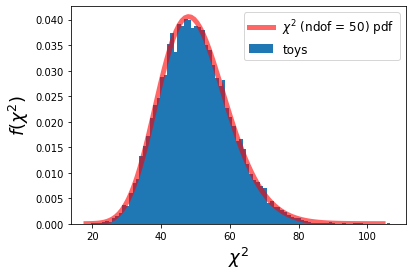

50


In [180]:
plt.figure()
fig, ax1 = plt.subplots()
h = plt.hist(chiSqAr, bins='auto', density=True, label='toys')
df = nBins
x = np.linspace(stats.chi2.ppf(0.00001, df), stats.chi2.ppf(0.99999, df), 100)
label = '$\chi^{2}$ (ndof = ' + str(nBins) + ') pdf'
ax1.plot(x, stats.chi2.pdf(x, df), 'r-', lw=5, alpha=0.6, label=label)
labely = ax1.set_xlabel("$\chi^{2}$", fontsize = 18)
labely = ax1.set_ylabel("$f(\chi^{2})$", fontsize = 18)
legend = ax1.legend(loc='upper right', fontsize='large')
plt.show()

print(df)

* now we can make a **quantitative** statement about how well our **real** experiment fits our hypothesis
    * calculate $\chi_{real}^{2}$ for our **real** experiment
    
    * p-value = $\int_{\chi_{real}^{2}}^{+\infty} f(\chi^{2})d\chi^{2} = 1 - F(\chi^{2})$
    
    * p-value = "probability that an experiment would give a result more extreme than this **if the hypothesis is true**"

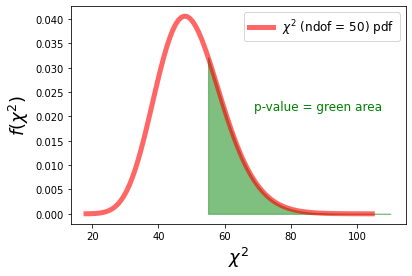

50


In [181]:
fig, ax = plt.subplots()

ax.plot(x, stats.chi2.pdf(x, df), 'r-', lw=5, alpha=0.6, label=label)
ax.set_xlabel("$\chi^{2}$", fontsize = 18)
ax.set_ylabel("$f(\chi^{2})$", fontsize = 18)
legend = ax.legend(loc='upper right', fontsize='large')

realChi2 = nBins*1.1 
px=np.arange(realChi2,realChi2*2,0.001)

ax.fill_between(px,stats.chi2.pdf(px, df),alpha=0.5, color='g')
 
left, right = plt.xlim()
bottom, top = plt.ylim() 
ax.text(right*0.6, top*0.5,"p-value = green area", color='g', fontsize=12)
plt.show()

print(df)

<Figure size 432x288 with 0 Axes>

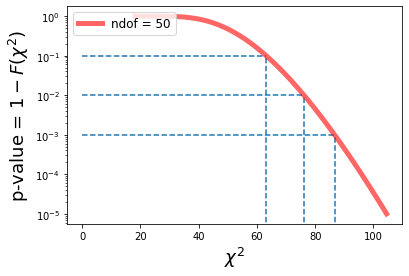

50


In [182]:
x = np.linspace(stats.chi2.ppf(0.00001, df), stats.chi2.ppf(0.99999, df), 100)
pval = (1.0 - stats.chi2.cdf(x, df))
plt.figure()
fig, ax1 = plt.subplots()
plt.yscale("log")
labely = ax1.set_xlabel("$\chi^{2}$", fontsize = 18)
labely = ax1.set_ylabel("p-value = $1 - F(\chi^{2})$", fontsize = 18)
label= "ndof = " + str(nBins)
ax1.plot(x, pval, 'r-', lw=5, alpha=0.6, label=label)
legend = ax1.legend(loc='upper left', fontsize='large')

yCV = [0.1, 0.01, 0.001]

for p in yCV:
    xCV = stats.chi2.ppf((1.0 - p), df)
    plt.hlines(p, 0.0, xCV,  linestyle="dashed")
    plt.vlines(xCV, 0.0, p,  linestyle="dashed")
    
plt.show()

print(df)

50


<Figure size 432x288 with 0 Axes>

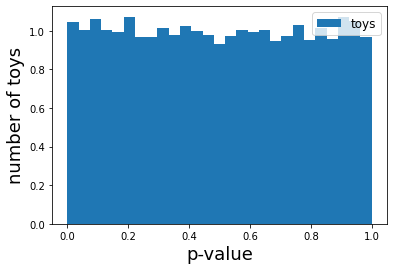

In [183]:
#what is the distribution of p-values across all toys? (assuming null hypothesis)

pvalAr = np.empty(nToys)

print(df)
for toy in range(0, nToys):
    #print(chiSqAr[toy])
    pval = (1.0 - stats.chi2.cdf(chiSqAr[toy], df))
    pvalAr[toy] = pval

plt.figure()
fig, ax1 = plt.subplots()
h = plt.hist(pvalAr, bins='auto', density=True, label='toys')
df = 50
x = np.linspace(0.0, 1.0, 100)
label = '$\chi^{2}$ (ndof = ' + str(df) + ') pdf'
#ax1.plot(x, stats.chi2.pdf(x, df), 'r-', lw=5, alpha=0.6, label=label)
labely = ax1.set_xlabel("p-value", fontsize = 18)
labely = ax1.set_ylabel("number of toys", fontsize = 18)
legend = ax1.legend(loc='upper right', fontsize='large')
plt.show()


In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

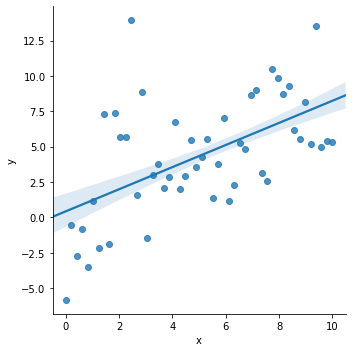

In [185]:
import seaborn as sns

x = np.linspace(0,10)
y = 3*np.random.randn(50) + x

data = {'x':x, 'y':y}
frame = pd.DataFrame(data, columns=['x', 'y'])
sns.lmplot('x', 'y', frame, ci=68)

plt.savefig("confidence_band.pdf")

<ipython-input-208-396fdd9bca8a>:16: RuntimeWarning: invalid value encountered in sqrt
  y_unc = np.sqrt(toyHist)


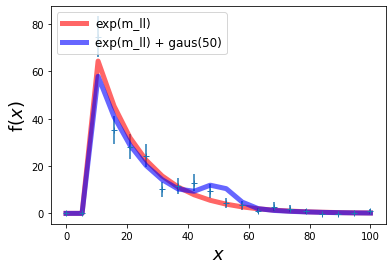

In [208]:
nToys = 1

m_ll_bins = np.linspace(0.0, 100.0, 20)

pdfPreds = stats.expon.pdf(m_ll_bins, 10, 15)
pdfPredsSig = stats.norm.pdf(m_ll_bins, 50, 5)

toyHist = genRandHist(pdfPreds, 1000)

plt.figure()

ax = plt.gca()
labely = ax.set_xlabel("$x$", fontsize = 18)
labely = ax.set_ylabel("f($x$)", fontsize = 18)

y_unc = np.sqrt(toyHist)
ax.errorbar(m_ll_bins, toyHist, xerr=0.0, yerr=y_unc, ls='none', marker = "+")

b_only = 1000*pdfPreds
s_b =(900*pdfPreds + 100*pdfPredsSig)

ax.plot(m_ll_bins, b_only, 'r-', lw=5, alpha=0.6, label='exp(m_ll)')
ax.plot(m_ll_bins, s_b, 'b-', lw=5, alpha=0.6, label='exp(m_ll) + gaus(50)')

legend = ax.legend(loc='upper left', fontsize='large')
plt.show() 
plt.close()

In [210]:
like_l = 1.0

for bin in range(0, 19):
    print(toyHist[bin])
    like_l_bonly = like_l*stats.expon.pdf(m_ll_bins, 10, 15)
    
    (stats.norm.pdf(toyHist[bin], 50.0, 5))
    
#    like_l_bonly = like_l*(stats.norm.pdf(toyHist[bin], 50.0, 5))

0.0
0.0
74.66079638455008
35.20205991577725
28.179206190756297
24.348367631807573
10.155808378738246
11.62587546837749
13.000788037317779
9.361028996338117
4.403823513435801
3.4592427565963684
1.1896820142149993
2.9024528885609673
1.9926466585518368
0.8089234760045361
-0.2289224060111309
-0.17710454217390903
-0.041420558471162244
